# **Loan Default Prediction**

by: Moiez Ismail

#### Table of contents: 
- [Data overview](#Data-overview)
- [Data cleaning](#Data-cleaning)
- [Univariate analysis](#Univariate)
- [Bivariate analysis](#Bivariate)
- [Insights from EDA](#Insights-from-EDA)
- [Model data prep](#Model-data-prep)
- [Model evaluation criterion](#Model-evaluation-criterion)
- [Model comparison and conclusion](#Model-conclusion)
- [Executive summary + Solution design proposal](#Executive-summary)

## Problem definition

### 1. The Context:

- Global bank, a retail bank,(GB hereafter) profits from the interest paid on loans but the loans are an investment for the bank and thus carry risk because clients can default on their loan. A default(DL hereafter) occurs when a borrower misses multiple payments or stops making required payments altogether. Not every approved-loan is paid-off(GL hereafter) and thus is considered delinquent. The loan-approval process is important because a paid-off loan(GL hereafter) is desirable but avoiding approving loans that will default(Dl hereafer) is even more desirable in this case.

-  The bank makes a decision on the creditworthiness of the applicant on the basis of a various factors. And this process nor the outcome is 100% accurate. In order to make the process less subjective to human error, the bank is employing a machine-learning model. A single factor, such as income amount, is indeterminate of the client's likelihood of DL or GL, and thus of the loan-approval.

### 2. The objective:

- Based on the bank's aim to identify people who are most likely to default on their loans, the objective here is to create a machine-learning model that is able to predict DL and GL then give recommendations to the bank on the important features to consider/create to aid in the loan-approval process.

### 3. The key questions:

-  This project(the EDA and ML models) seek to answer the following : What factor(s) are most determinate of a client's likelihood to be a DL? Is there a large difference in certain features with respects to DL and GL clients? What other features could we add for explanatory and predictive power? 

### 4. The problem formulation:
Also see for further details : - [Model evaluation criterion](#Model-evaluation-criterion)

-  the problem is binary classification(GL or DL) importance is on predicting actual positives(DLs) and false negatives(predict to be GL but turn out to be DL) this means predicting successfully who will be a DL as opposed to predicting all DL and GL. 

## Data description
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and data**

In [384]:
import plotly.io as pio
pio.renderers.default = "svg"
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import skew, pearsonr, normaltest, ttest_ind, f_oneway, chisquare, chi2_contingency, shapiro
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

## Data overview
1. understanding the shape of data, data types and missing values
2. checking for duplicated values
3. creating numerical and categorical column names lists
4. having a look at the summary statistics of the numerical columns

In [385]:
data = pd.read_csv('/Users/moiezismail/Study/MIT/capstone/loan.csv')
loan = data.copy() # Creating a copy of the original variable in case we need to go back to the original dataset

In [386]:
# Let's a look of a sample of the dataframe
loan.sample(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
200,0,5100,NaN,28291.0,DebtCon,Other,2.0,0.0,0.0,277.944561,1.0,14.0,23.644691
4560,0,23800,NaN,55669.0,DebtCon,Other,NaN,0.0,1.0,308.425126,0.0,18.0,37.654075
3518,0,18600,72860.0,90347.0,DebtCon,Other,0.0,1.0,1.0,104.040467,2.0,26.0,36.025925
4588,1,24000,19500.0,38000.0,DebtCon,Other,NaN,0.0,1.0,198.900000,NaN,17.0,NaN
1219,0,10100,137299.0,200339.0,DebtCon,ProfExe,0.0,0.0,0.0,66.357590,2.0,23.0,35.237701


In [387]:
# Decimal values are quite large so let's clean it up to just 2 decimal places

loan = np.round(loan,2)

In [388]:
# The info method gives us the shape as well as the data types in one place
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [389]:
# Code to find out the % of missing values for each column 
np.round(loan.isnull().sum() / len(loan.isnull()) * 100)

BAD         0.0
LOAN        0.0
MORTDUE     9.0
VALUE       2.0
REASON      4.0
JOB         5.0
YOJ         9.0
DEROG      12.0
DELINQ     10.0
CLAGE       5.0
NINQ        9.0
CLNO        4.0
DEBTINC    21.0
dtype: float64

**Observations**
1. the only variables that don't have missing values are: BAD and LOAN
2. the MORTDUE, YOJ, DEROG, and DEBTINC variables have many missing variables
3. will create drop null values in the REASON category as NULL does not mean = lack of a value. When someone is taking out a loan(there must be some reason but may not fit into home improvement or debt reconciliation but 'other' as a category is not helpful or explanatory 
5. For JOB, I will drop null values since the bank would not approve a loan to unmployed individuals or people who do not have a business etc. but i CANNOT just impute a value such as 'Other' since that is not explanatory

In [390]:
loan.duplicated().sum()

0

No duplicate values

#### Summary statistics

In [391]:
np.round(loan.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00


**Observations**
1. The target variable, BAD, has an average of 0.20 which means 20% of clients are DL and 80% of GL
2. DEBTINC : the mean and median are the exact same(indicating a normal distribution) so I'll use that to impute the NULLs 
2. The average loan amount approved is 18,607 USD with the highest value approved almost 90,000
3. The range for Mortage due on the house is quite wild since the highest value is almost 400k USD with a standard deviation of 44k USD
4. Years on job avearges at around 9 years with a standard deviation at almost the same amount indicating quite a large range for the interquartile range
5. DEROG, DELINQ, NINQ are small value range so I'll use countplots for visualization
6. CLNO is not a high but not as low as the small range variables so I'll use the mean to impute values

Based on the summary stats as well as amount of missing values, I'll create a sister dataset in which the only treatment will be dropping of null values to test its performance on the models against a treated dataset

In [392]:
loan2 = loan.copy()

## EDA:

1. Data cleaning: dealing with null and outliers
1. Univariate
2. Bivariate
3. Multivariate 

### Data cleaning:
1. Loan1 is with imputed values 2) Loan2 is nullvalues dropped

In [393]:
# Let's create a categorical variable for the defaulting status of clients
loan['Status'] = loan['BAD'].apply(lambda x: 'Good' if x == 0 else 'Default')

In [394]:
# A dataframe for the averages of all variables against the defaulting status 
np.round(loan.groupby(['Status']).mean(),2).T

Status,Default,Good
BAD,1.00,0.00
LOAN,16922.12,19028.11
MORTDUE,69460.45,74829.25
VALUE,98172.85,102595.92
YOJ,8.03,9.15
DEROG,0.71,0.13
DELINQ,1.23,0.25
CLAGE,150.19,187.00
NINQ,1.78,1.03
CLNO,21.21,21.32


### Treating Outliers

Outliers will affect the model's performance and this dataset has many so let's deal with them. 

In [395]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3 - Q1   # IQR Range
    lower_lim = Q1 - (1.5 * IQR) #define lower limit
    upper_lim = Q3 + (1.5 * IQR)  # define upper limit
    
    df[col] = np.clip(df[col], lower_lim, upper_lim)
    return df
# all the values smaller and larger than the limits will be dropped  

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df, c)
        
    return df

num_col = ['LOAN','MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
loan = treat_outliers_all(loan, num_col)

### Treating Missing Values

### Imputing values using measures of central tendency
1. For the low value numerical variables: DEROG, DELINQ, and NINQ, I believe the average would be better than the median because the values do not go very far int the upper ranges and most values are 0
2. For the other numerical variables, the distributions are not normal, and skewed so median would be a more accurate measure
3. For the categorical variables, I will not impute the most common value, instead, another category will be created since it's not possible for a registered client to be approved for a loan without a reason.

In [396]:
loan['VALUE'] = loan['VALUE'].replace(np.nan, loan.VALUE.median())
loan['MORTDUE'] = loan['MORTDUE'].replace(np.nan, loan.MORTDUE.median())
loan['YOJ'] = loan['YOJ'].replace(np.nan, loan.YOJ.median())
loan['DEBTINC'] = loan['DEBTINC'].replace(np.nan, loan.DEBTINC.median())
loan['CLNO'] = loan['CLNO'].replace(np.nan, loan.CLNO.median())
loan['CLAGE'] = loan['CLAGE'].replace(np.nan, loan.CLAGE.median())
loan['DEROG'] = loan['DEROG'].replace(np.nan, loan.DEROG.median())
loan['NINQ'] = loan['NINQ'].replace(np.nan, loan.NINQ.median())
loan['DELINQ'] = loan['DELINQ'].replace(np.nan, loan.DELINQ.mean())

loan = loan.dropna(subset=['JOB'])
loan = loan.dropna(subset=['REASON'])
loan = loan[loan['JOB'] != 'Other']

### Dropping all null values from the sister-dataset Loan2 to test its performance against the dataset Loan 1
loan2 = loan2.dropna()

In [397]:
np.round(loan.isnull().sum() / len(loan.isnull()) * 100)

BAD        0.0
LOAN       0.0
MORTDUE    0.0
VALUE      0.0
REASON     0.0
JOB        0.0
YOJ        0.0
DEROG      0.0
DELINQ     0.0
CLAGE      0.0
NINQ       0.0
CLNO       0.0
DEBTINC    0.0
Status     0.0
dtype: float64

#### Data is cleaned up, let's start the analysis

In [398]:
loan.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Status
362,0,6300,99469.0,116260.0,HomeImp,Office,23.0,0.0,0.0,124.75,1.0,12.0,35.64,Good
3936,0,20600,124323.0,166781.0,DebtCon,Office,4.0,0.0,1.0,381.03,1.0,42.5,37.17,Good
1899,0,12600,84933.0,110253.0,DebtCon,ProfExe,8.0,0.0,0.0,192.42,1.0,37.0,40.85,Good


### Univariate


#### 1. What is the range of values for the loan amount variable "LOAN"?

In [399]:
print(loan.LOAN.min(),loan.LOAN.max())
print(f"The range of the amount of loan is ${loan.LOAN.max() - loan.LOAN.min()}") 

1700 41600
The range of the amount of loan is $39900


Let's visualize multiple variables normalized distribution within the same graph

Multi-distribution 1

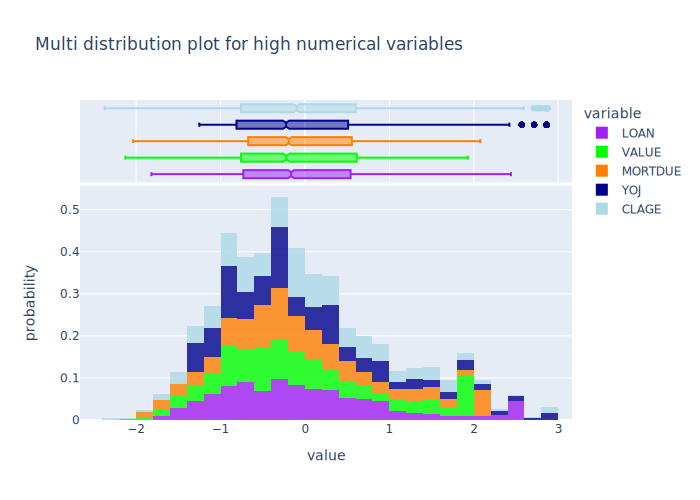

In [400]:
x_vars = ['LOAN', 'VALUE', 'MORTDUE', 'YOJ', 'CLAGE']

# normalize the variables because they're on different scales
loan_norm = (loan[x_vars] - loan[x_vars].mean()) / loan[x_vars].std()

px.histogram(loan_norm, x=x_vars,
             nbins=50, title='Multi distribution plot for high numerical variables',
             histnorm='probability', 
             opacity=0.8, marginal='box', 
             color_discrete_sequence=['#A020F0', '#00FF00', '#FF8000', '#00008B', '#ADD8E6'])

Multi-distribution 2

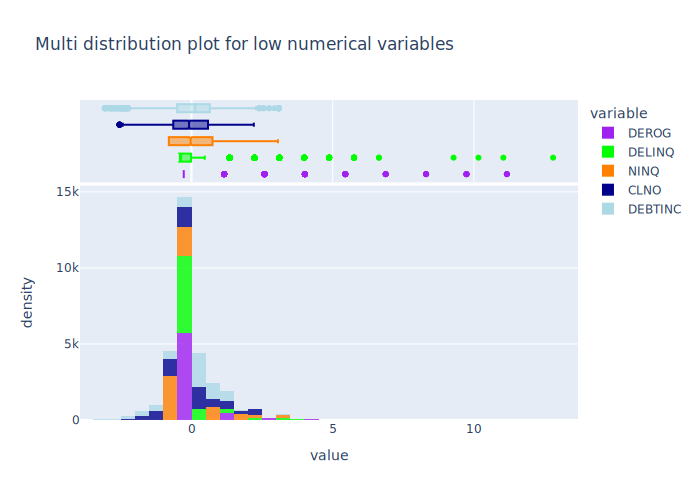

In [401]:
x2_vars = ['DEROG', 'DELINQ', 'NINQ', 'CLNO', 'DEBTINC']

# normalize the variables because they're on different scales
loan_norm2 = (loan[x2_vars] - loan[x2_vars].mean()) / loan[x2_vars].std()

px.histogram(loan_norm2, x=x2_vars,
             nbins=50, title='Multi distribution plot for low numerical variables',
             histnorm='density', 
             opacity=0.8, marginal='box', 
             color_discrete_sequence=['#A020F0', '#00FF00', '#FF8000', '#00008B', '#ADD8E6'])

**Observations**
1. Multi-distribution 1 : visually there is a left skew as the mean seems to be a little less than 0 for pretty much all of the variables. 
2. The mean will be smaller than the median in these distributions.
3. There seems to be a colinearity where CLAGE, YOJ, MORTDUE all follow a similar distribution such as the mode being just lower than 0.
4. Multi-distribution 2: most values sem to be around the middle but the distribution is skewed as shown by the statistical test for normality

Let's find out the stats summary for these numerical variables to have a quick look at the numbers

In [402]:
print('LOAN summary:')
print(np.round(loan.LOAN.describe(),2))
print('-'*30)
print('VALUE summary:')
print(np.round(loan.VALUE.describe(),2))
print('-'*30)
print('MORTDUE summary:')
print(np.round(loan.MORTDUE.describe(),2))
print('-'*30)
print('YOJ summary:')
print(np.round(loan.YOJ.describe(),2))
print('-'*30)
print('CLAGE summary:')
print(np.round(loan.CLAGE.describe(),2))
print('-'*30)
print('DEROG summary:')
print(np.round(loan.DEROG.describe(),2))
print('-'*30)
print('DELINQ summary:')
print(np.round(loan.DELINQ.describe(),2))
print('-'*30)
print('CLNO summary:')
print(np.round(loan.CLNO.describe(),2))
print('-'*30)

LOAN summary:
count     3216.00
mean     18736.26
std       9367.51
min       1700.00
25%      11900.00
50%      17200.00
75%      23800.00
max      41600.00
Name: LOAN, dtype: float64
------------------------------
VALUE summary:
count      3216.00
mean     111042.18
std       46337.40
min       12500.00
25%       75955.25
50%      100848.50
75%      139427.75
max      200447.38
Name: VALUE, dtype: float64
------------------------------
MORTDUE summary:
count      3216.00
mean      80153.44
std       38088.67
min        2619.00
25%       54559.50
50%       72853.50
75%      101305.25
max      159306.00
Name: MORTDUE, dtype: float64
------------------------------
YOJ summary:
count    3216.00
mean        8.52
std         6.81
min         0.00
25%         3.00
50%         7.00
75%        12.00
max        28.00
Name: YOJ, dtype: float64
------------------------------
CLAGE summary:
count    3216.00
mean      183.82
std        77.44
min         0.00
25%       125.09
50%       176.17
75%  

Let's perform a skew test to test whethere this data is normally distrubted or not from a statistical perspective

State the hypothesis:
* $H_0:$ There is no skewness, the variables are normally distributed
* $H_1:$ There is skewness, the variables are not normally distributed

alpha = 0.05

In [403]:
from scipy.stats import normaltest, skewtest

def test_normality(data):
    # Skew test
    skew_test_num = [
        ('LOAN', stats.skewtest(data['LOAN'])[1]),
        ('VALUE', stats.skewtest(data['VALUE'])[1]),
        ('MORTDUE', stats.skewtest(data['MORTDUE'])[1]),
        ('YOJ', stats.skewtest(data['YOJ'])[1]),
        ('CLAGE', stats.skewtest(data['CLAGE'])[1]),
        ('DEROG', stats.skewtest(data['DEROG'])[1]),
        ('DELINQ', stats.skewtest(data['DELINQ'])[1]),
        ('NINQ', stats.skewtest(data['NINQ'])[1]),
        ('CLNO', stats.skewtest(data['CLNO'])[1]),
        ('DEBTINC', stats.skewtest(data['DEBTINC'])[1])
    ]
    # for loop to print out the name of the variable and whether or not it's skewed based on the skew-test
    for var, pval in skew_test_num:
        if pval < 0.05:
            print(var, "is skewed")
        else:
            print(var, "is NOT skewed")

    # Normal test
    normal_test_list = [
        ('LOAN', stats.normaltest(data['LOAN'])[1]),
        ('VALUE', stats.normaltest(data['VALUE'])[1]),
        ('MORTDUE', stats.normaltest(data['MORTDUE'])[1]),
        ('YOJ', stats.normaltest(data['YOJ'])[1]),
        ('CLAGE', stats.normaltest(data['CLAGE'])[1]),
        ('DEROG', stats.normaltest(data['DEROG'])[1]),
        ('DELINQ', stats.normaltest(data['DELINQ'])[1]),
        ('NINQ', stats.normaltest(data['NINQ'])[1]),
        ('CLNO', stats.normaltest(data['CLNO'])[1]),
        ('DEBTINC', stats.normaltest(data['DEBTINC'])[1])
    ]
    print("-"*30)
    # for loop to print out the name of the variable and whether or not it's normal based on the normal-test
    for var, pval in normal_test_list:
        if pval < 0.05:
            print(var, "is NOT normal")
        else:
            print(var, "is normal")
            
test_normality(loan)

LOAN is skewed
VALUE is skewed
MORTDUE is skewed
YOJ is skewed
CLAGE is skewed
DEROG is skewed
DELINQ is skewed
NINQ is skewed
CLNO is skewed
DEBTINC is skewed
------------------------------
LOAN is NOT normal
VALUE is NOT normal
MORTDUE is NOT normal
YOJ is NOT normal
CLAGE is NOT normal
DEROG is NOT normal
DELINQ is NOT normal
NINQ is NOT normal
CLNO is NOT normal
DEBTINC is NOT normal


**Observations**
1. all variables are not-normally distributed and skewed

Function for plotting the distributions as a histogram with a boxplot 

In [404]:
import plotly.express as px

def plot_histogram(variable):
    variable_name = variable.name
    fig = px.histogram(loan, x=variable, marginal='box', text_auto=True,
                       labels={variable_name: variable_name.capitalize(), 'count': 'Count'},
                       color_discrete_sequence=['green'],
                       title=f"Distribution of {variable_name.capitalize()}")
    fig.show()

**Observation** 
1. Looks like a LOAN is mostly all centered between 11K and 23K
2. The value of the houses follow a very similar pattern in that most of it is centered around the middle with a high value at the top

#### 2. How does the distribution of years at present job "YOJ" vary across the dataset?
**Observations** 
1. The average is about 9 years with a large standard deviation close to the average at 7 and a half years
2. The minimum is strage as it is in 0 years which does not make sense but it could be that it's less than a year of working at their current job
3. The most years working at current job tops out at 41 years

#### 3. How many unique categories are there in the REASON variable?

In [405]:
loan.REASON.nunique()

2

**Observations**
1. I find it strange that there weren't more than 2 categories, or an 'Other' category as surely there must be more than 2 reasons to take out a loan
2. JOB and REASON variables will be one-hot encoded later for the models

#### 4. What is the most common category in the JOB variable?

In [406]:
loan['JOB'].value_counts()

ProfExe    1252
Office      921
Mgr         746
Self        188
Sales       109
Name: JOB, dtype: int64

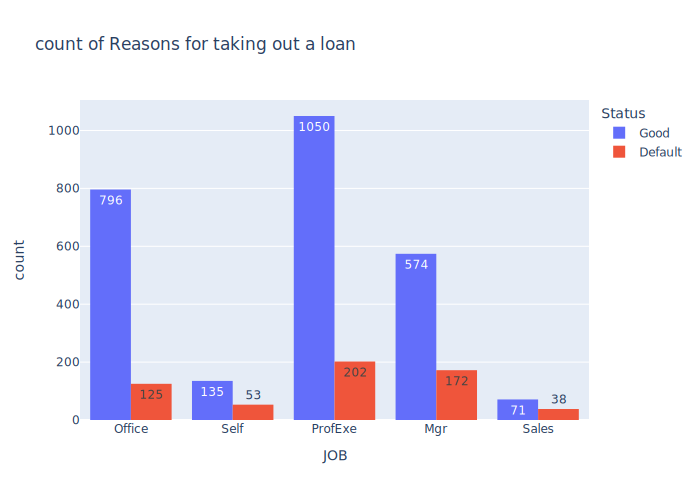

In [407]:
px.histogram(loan, x='JOB', title='count of Reasons for taking out a loan',
             color='Status', barmode='group',text_auto=True)

**Observations**
1. In both good and default status, Prof ex make up the largest portion but Office jobs make up the 2nd largest portion in good loans unlike in defaulting where Managers up the 2nd largest
2. Self-employed is the least common job of clients who take out a loan

In [408]:
np.round(loan['DEBTINC'].describe().T,2)

count    3216.00
mean       33.98
std         6.40
min        14.35
25%        30.73
50%        34.82
75%        38.11
max        53.79
Name: DEBTINC, dtype: float64

**Observations**
1. This data seems to be left skewed meaning as the ratio of debt to income increases, we find more and more people in that level with around 35 being the most common. 
2. The max value is more than 3x the standard deviation value at 53.8

### Bivariate
1. The target variable is BAD, but I will use Status in order to make visualization easier
2. It is not necessary to look at the correlation between all variables; I will use the target variable with other features to perform the bivariate analysis

#### 5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

Let's answer that with a chi-squared hypothesis test: 

State the hypothesis:
* $H_0:$ There is no relationship between the two Reasons and loan status.  
* $H_1:$ There is a statistically significant relationship between between the reasons for taking out a loan and whethere or not the loan will be paid of

alpha = 0.05

In [409]:
from scipy.stats import chi2_contingency

reason_status_cont = pd.crosstab(loan['Status'], loan['REASON'])

status_reason = chi2_contingency(reason_status_cont)[1]

if status_reason < 0.05:
    print('Evidence to reject the null hypothesis, there is a relationship between the two variables')
else:
    print('Evidence is not sufficient to reject the null, there is no significant relationship')

Evidence is not sufficient to reject the null, there is no significant relationship


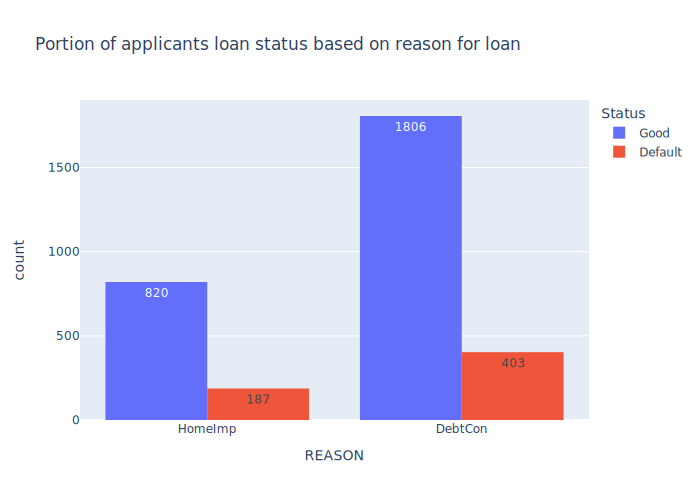

In [410]:
px.histogram(loan, x='REASON', 
             color='Status', 
             barmode='group', 
             text_auto=True, title='Portion of applicants loan status based on reason for loan')

**Observations**
1. This questions is tough to answer because we do not have the same number of clients who take a loan out for the same reasons 
2. For both people who took a loan for home improvement and defaulted(187) vs. those who took it out for debt consolidation(403)
2. An overwhelming people take out a loan for debt consolidation and paid it off. 

Let's see if the # of derogatory reports(which probably includes the delinquent payments) has any relationship 
with the status of loans

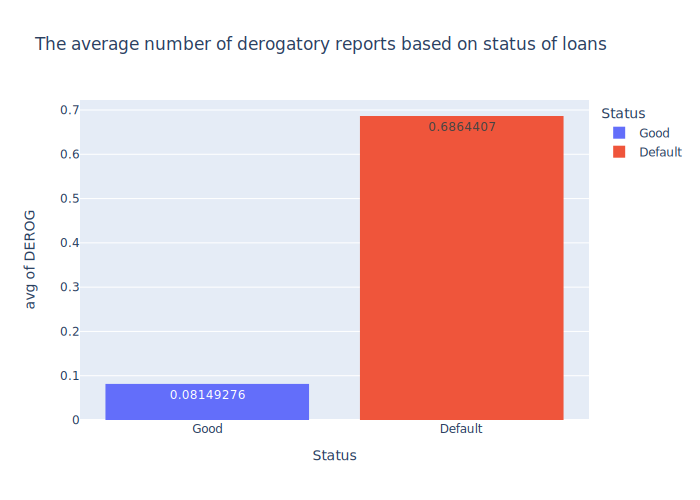

In [411]:
px.histogram(loan, x='Status', y='DEROG',
             color='Status', 
             histfunc='avg', 
             text_auto=True, title='The average number of derogatory reports based on status of loans')

**Observations**
1. This is quite an overwhelming difference in the average of GL at 0.08 and DL at 0.7

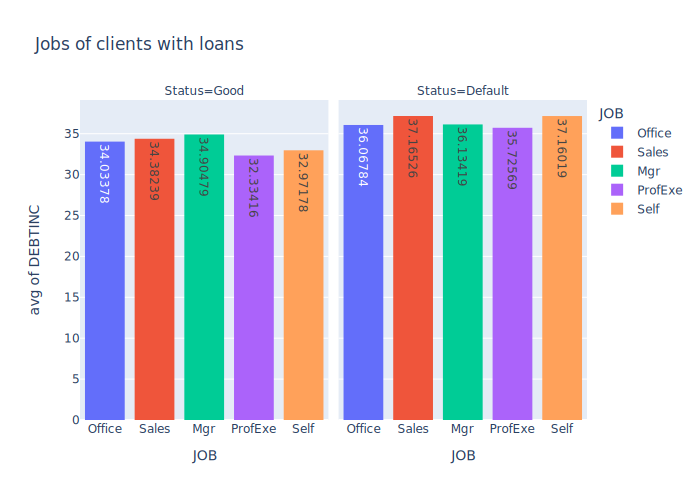

In [412]:
px.histogram(loan, title='Jobs of clients with loans', y='DEBTINC',
             x='JOB', histfunc='avg',color='JOB', facet_col="Status",
             text_auto=True)

**Observations**
1. There doesn't seem to be any outliers or stark difference between the jobs and their average Debt to income ratio for both default and good status clients. 

**Observation**
1. There isn't really a correlation for either variable
2. THe good status loans have a slight negative correlation between size of loan and years worked at current job
3. For defaulted clients, it's the opposite

Let's have a look at the debt to income ratio and the size of the loan and see if there is a relationship between good and defaulted loans

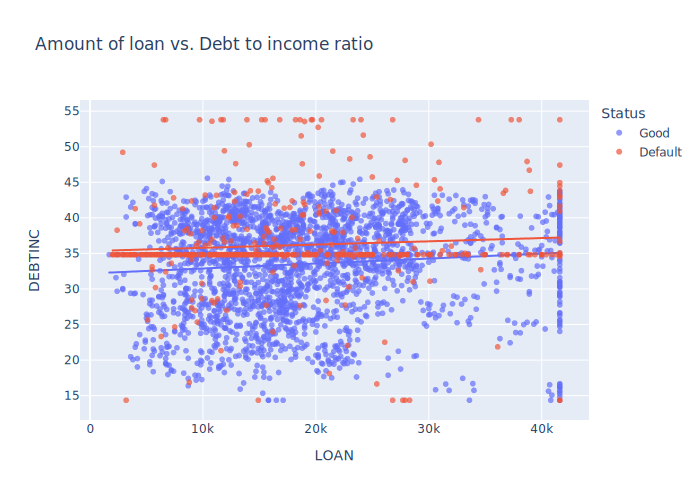

In [413]:
px.scatter(loan, x='LOAN', y='DEBTINC', color='Status', opacity=0.7,
           trendline='ols',title ='Amount of loan vs. Debt to income ratio')

**Observations**
1. There isn't a correlation between the debt to income ratio and the amount of loan 
2. The DLs have a higher debt to income ratio than GLs but the loan amount seems to be the same

#### 6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?

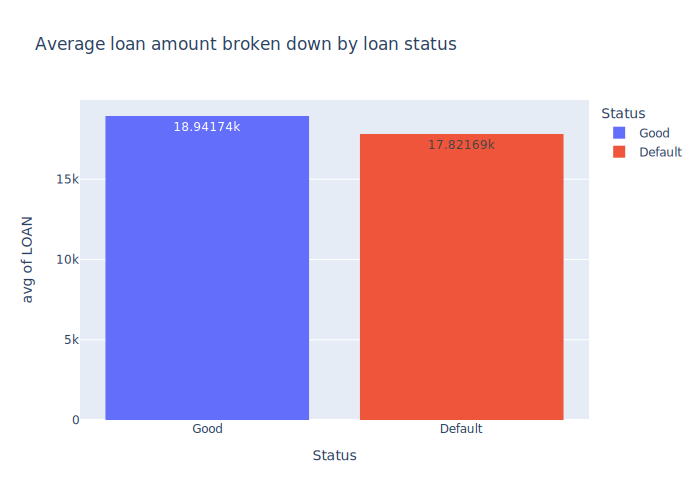

In [414]:
px.histogram(loan, histfunc='avg', title='Average loan amount broken down by loan status', 
             x='Status', y='LOAN', color='Status', text_auto=True)

In [415]:
np.round((loan[loan['Status'] ==
               'Good']['LOAN'].mean()) - (loan[loan['Status'] == 'Default']['LOAN'].mean()),2)                                                                  

1120.04

**Observations**
1. Surprisingly, the average for defaulting loan amount is smaller than the good status loans.
2. only about a 1100 dollar difference between the averages

Let's answer with a Mann-Whitney U test since LOAN is not normally distributed: 

State the hypothesis:
* $H_0:$ The average approved loan is defaulting and good clients are statistically the same.   
* $H_1:$ There is a statistically significant difference bewteen the average of clients who default and good clients

alpha = 0.05

In [416]:
# Since LOAN is not normally distributed, we have to use the mann-whitney U test

default_loan = loan[loan['Status'] == 'Default']['LOAN']
good_loan = loan[loan['Status'] == 'Good']['LOAN']

stat, p = stats.mannwhitneyu(default_loan, good_loan) # Conducting the test 

if p < 0.05:
    print('Sufficient evidence to reject the null hypothesis')
else:
    print('Not enough evidence to reject the null hypothesis')

Sufficient evidence to reject the null hypothesis


**Observation**
1. SO even though it is only about 1.1k, it is a significant difference

#### 7. Is there a correlation between the value of the property and the loan default rate?

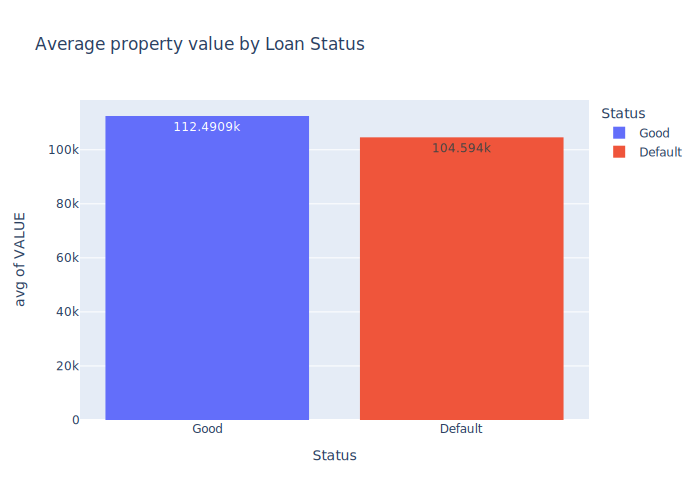

In [417]:
px.histogram(loan, x='Status', y='VALUE' ,color='Status',
             histfunc='avg',
             text_auto=True, labels={'avg of VALUE':'Average value of property'},
             title=' Average property value by Loan Status')


Let's answer that with a similar test: 

State the hypothesis:
* $H_0:$ The average value of property between good and defaulting clients are statistically the same.   
* $H_1:$ There is a statistically significant difference bewteen the average property value of good and defaulting clients

alpha = 0.05

In [418]:
default_value = loan[loan['Status'] == 'Default']['VALUE']
good_value = loan[loan['Status'] == 'Good']['VALUE']

stat, p = stats.mannwhitneyu(default_value, good_value) 
if p < 0.05:
    print('Sufficient evidence to reject the null hypothesis')
else:
    print('Not enough evidence to reject the null hypothesis')

Sufficient evidence to reject the null hypothesis


In [419]:
np.round(good_value.mean() - default_value.mean())

7897.0

**Observations**
1. Similar to the relationship between Loan amount and default rate, there isn't a stark visual difference in the average property value of good and defaulting clients but statistically there is a difference. 
2. The average value of property of good clients is 7.9k higher than defaulting clients

#### 8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

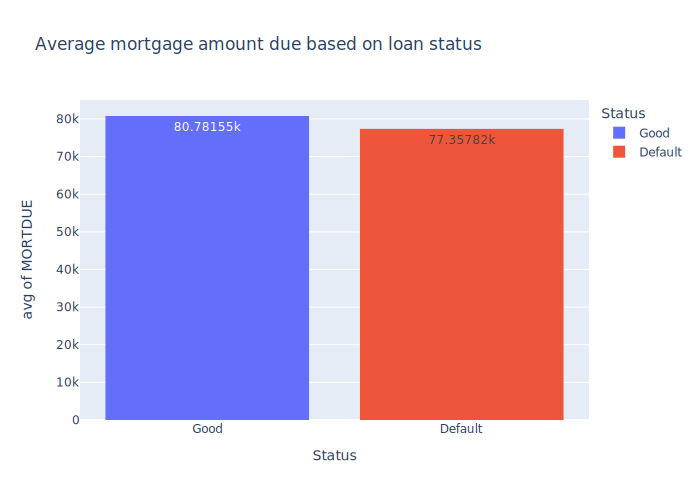

In [420]:
px.histogram(loan, x='Status', title='Average mortgage amount due based on loan status', 
             color='Status', text_auto=True, y='MORTDUE', histfunc='avg')

Let's answer that with another mann-whitney test since MORTDUE is not normally distributed either: 

State the hypothesis:
* $H_0:$ The average mortgage left on the property between good and defaulting clients are statistically the same. 
* $H_1:$ There is a statistically significant difference bewteen the average mortgage left bewteen good and defaulting clients

alpha = 0.05

In [421]:
default_mort = loan[loan['Status'] == 'Default']['MORTDUE']
good_mort = loan[loan['Status'] == 'Good']['MORTDUE']

stat, p = stats.mannwhitneyu(default_mort, good_mort) 

if p < 0.05:
    print('Sufficient evidence to reject the null hypothesis')
else:
    print('Not enough evidence to reject the null hypothesis')

Sufficient evidence to reject the null hypothesis


In [422]:
np.round(good_mort.mean() - default_mort.mean())

3424.0

**Observations**
1. Based on a visual, there isn't a big difference at all  but this 3.4K difference is statistically significant
2. Just like property value of house and loan amount, mortgage due is also higher for good status loans.

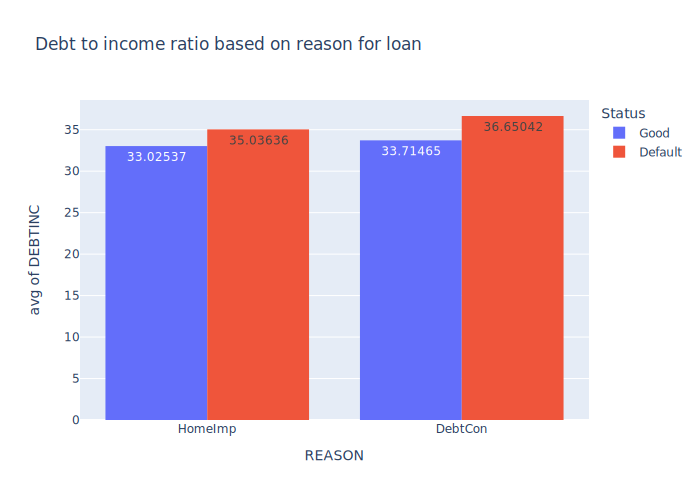

In [423]:
px.histogram(loan, x='REASON', color='Status', barmode='group', histfunc='avg',
             y='DEBTINC', text_auto=True, title='Debt to income ratio based on reason for loan')

**Observations**
1. The average debt to income ratio is higher for DL than GL for both home improvement and debt reconciliation loans

### **Multivariate Analysis**

First, let's make a mini dataframe of all the averages of all numerical columns grouped by status in vertical form

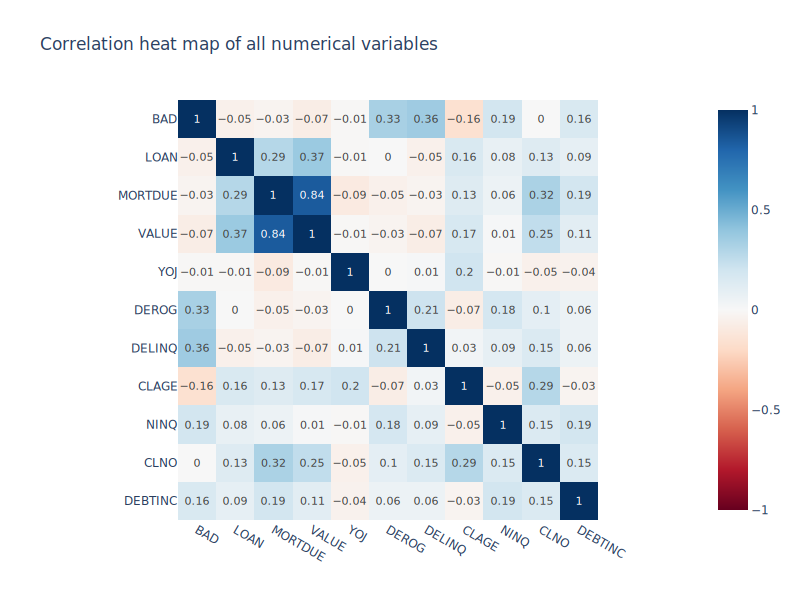

In [425]:
fig = px.imshow(np.round(loan.corr(),2),
                range_color=[-1, 1],
                text_auto=True, title='Correlation heat map of all numerical variables',
                color_continuous_scale='RdBu')
fig.update_layout(width=800, height=600)

**Observations**
1. There aren't any correlations of significance with resepcts to the loan status(BAD) category
2. the only strong correlation is with BAD(loan status) is DEROG and DELINQ but they are still quite weak correlations

## Insights from EDA

- The dataset consisted of mostly non-normal distributions with heavy skew to the right(outliers in the upper ranges)
- Many of the variables have the same distributions such as LOAN, VALUE, MORTDUE because they are related in the real world- The amount of loan one takes out is heavily dependent on the cost of the property which determines how much mortgage is due
- With respects to the status of loans there isn't much of a visual difference between the status of a client and their loan amount or mortgage due, or the value of their property
- Because many of the distributions weren't normal, I utilized the Mann-Whitney U test to determine if the small difference in the average loan between DL and GL clients is significant and indeed there is evidence to believe that there is a difference 
- It seems that most people who have defaulted have taken out loans for debt reconciliation rather than home improvement(which itself is considered an investment) and so the home improvement loans were more likely to be paid off 
- Variables like 'Income' and '# of household members' would help, and more categories in the JOB and REASON

### Feature engineering
- Adding in more relevant features may help the model more sensitive to the data and see a pattern that it did not before

In [339]:
# Assuming that the debt = mortgage due on the property(the debt in DEBTINC is most likely total debt)
loan['INCOME'] = loan['MORTDUE'] / (loan['DEBTINC'] / 100)

In [340]:
loan.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'Status', 'INCOME'],
      dtype='object')

### **Model data prep**
1. Data preparation (create 2 datasets for model to compare performance)
2. Partition the data into train and test set (scale the data for logistic regression)
3. Build the model (base models of Logistic Regression, Decision Trees + Random forest)
4. Fit on the train data
5. Tune the model (Gridsearch CV utilized)
6. Test the model on test set

In [341]:
# Convert categorical variables to numerical using one-hot encoding for both datasets
loan = pd.get_dummies(loan, columns=['REASON', 'JOB'])
loan2 = pd.get_dummies(loan2, columns=['REASON', 'JOB'])

In [342]:
# creating the target variable and taking it out of the independent variable dataframe
y = loan['BAD']
y2 = loan['BAD']
X = loan.drop(columns=['BAD', 'Status'], axis=1) #also dropping the status variable to avoid colinearity 
X2 = loan.drop(columns=['BAD', 'Status'], axis=1) #also dropping the status variable to avoid colinearity 
#Splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [343]:
# Scaling the data
sc = StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
# Turning the scaled train and test data into a datarame
scaledXtrain = pd.DataFrame(scaledXtrain, columns=X_train.columns)
scaledXtest = pd.DataFrame(scaledXtest, columns=X_test.columns)
# Loan2 dataset scaling
scaled_X2train = sc.fit_transform(X2_train)
scaled_X2test = sc.transform(X2_test)
scaled_X2train = pd.DataFrame(scaled_X2train, columns = X2_train.columns)
scaled_X2test = pd.DataFrame(scaled_X2test, columns = X2_test.columns)

## Model evaluation criterion

**Model can make wrong predictions as**:

1. Case 1(Type 2 error): Predicting a client will pay off their loan as expected to but actually defaults = False negative(FN) where prediction = 0 but actually 1 
2. Case 2(Type 1 error): Predicting a lead will default but actually does not do so = False positive(FP) predict = 1 but actually 0

### Which case is more important?

**Case 1: Predicting that the client will NOT default but actually does** i.e. a false negative can result in the bank approving a loan to a client who is going to default resulting loss of money. A false positive is not as deterimental as the bank may reject a loan to a client who will eventually pay it off resulting in profit, but this is not as costly as the former case. 

### How to reduce the losses?

**maximize Recall** : when recall is maximized, then false negatives are minimized, which results in highest number of predicting DL and thus predicting which clients will be GL.  In a case where both approving GL results in profit, and rejecting DL avoids loss of profit then a balance of recall and precision, the losses can be mitigated by approving loans to good clients as that will balance out the losses.  if the model can maximize predicting actual defaulting loans we can identify high-risk borrowers thus minimize giving out risky loans. 

### Function for printing out the evaluation of the model

In [344]:
def recall_matrix(model, xtrain, xtest, y_train, y_test):
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    train_recall_0 = metrics.recall_score(y_train,pred_train, pos_label=0)
    train_recall_1 = metrics.recall_score(y_train,pred_train, pos_label=1)
    test_recall_0 = metrics.recall_score(y_test,pred_test, pos_label=0)
    test_recall_1 = metrics.recall_score(y_test,pred_test, pos_label=1)

# print f1 scores
    print("recall score on training set for 0: ", np.round(train_recall_0,3))
    print("recall score on training set for 1: ", np.round(train_recall_1,3))
    print("recall score on test set for 0: ", np.round(test_recall_0,3))
    print("recall score on test set for 1: ", np.round(test_recall_1,3))
    
### 2 confusion matrices
    cm_train = confusion_matrix(y_train, pred_train)
    cm_test = confusion_matrix(y_test, pred_test)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
#### Confusion matrix shown through a heatmap    
    sns.heatmap(cm_train, annot=True, fmt='.2f', xticklabels=['Good', 'Defaulted'],
                yticklabels=['Good', 'Defaulted'], cmap='RdBu', annot_kws={"fontsize":14}, ax=axes[0])
    axes[0].set_title('Confusion Matrix for Training Data')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    
    sns.heatmap(cm_test, annot=True, fmt='.2f', xticklabels=['Good', 'Defaulted'],
                yticklabels=['Good', 'Defaulted'], cmap='RdBu', annot_kws={"fontsize":14}, ax=axes[1])
    axes[1].set_title('Confusion Matrix for Test Data')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')  
    plt.show()

### **Building the model**
Due to the nature of the problem (binary Classification) identifying whethere or not someone will default:
1. Logistic Regression (LG hereafter)
2. Decision Trees (DT hereafter)
3. Random Forests (RF hereafter)
4. XG boost (XGB hereafter) 

### Logistic Regression

In [345]:
lg = LogisticRegression()
lg.fit(scaledXtrain, y_train)

lg2 = LogisticRegression()
lg2.fit(scaled_X2train, y2_train)

LogisticRegression()

recall score on training set for 0:  0.975
recall score on training set for 1:  0.356
recall score on test set for 0:  0.967
recall score on test set for 1:  0.356


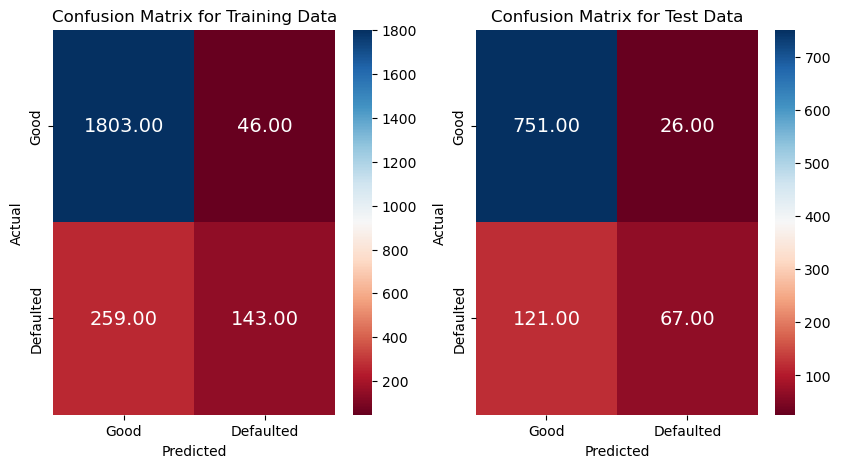

In [346]:
recall_matrix(lg, scaledXtrain, scaledXtest, y_train, y_test)

recall score on training set for 0:  0.975
recall score on training set for 1:  0.356
recall score on test set for 0:  0.967
recall score on test set for 1:  0.356


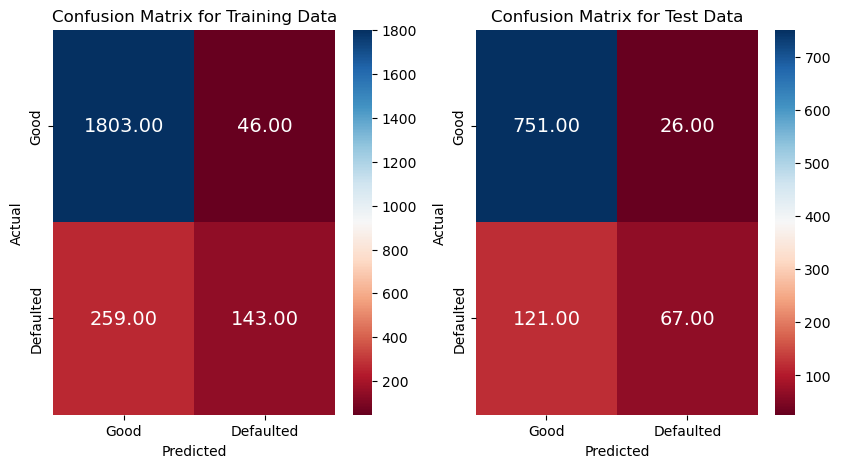

In [347]:
recall_matrix(lg2, scaled_X2train, scaled_X2test, y2_train, y2_test)

**Observation**
1. Both Loan1 and Loan2 models are doing a great job on the train and test data for identifying Good status clients, but doing a horrible job for the defaulting clients because 1= 0.085 for both models 

**Let's check the coefficients to see the variables contributing the most to defaulting on loans**

Since the coefficients are difficult to interpret, we will take the exponent of these logs to make sense of the features 

In [348]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
np.round(pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False),3) 

,odds
DELINQ,2.541
DEBTINC,2.094
INCOME,1.875
DEROG,1.817
NINQ,1.387
JOB_Sales,1.167
YOJ,1.122
JOB_Self,1.117
JOB_ProfExe,1.091
JOB_Mgr,1.038


**Observations:**
1. The first 4 features in order of decreasing strength of correlation, DELINQ, DEBTINC, INCOME, and DEROG are all positively correlated with the odds of defaulting on a loan
2. For example, for every increase in 1 unit of DELINQ, the odds of defaulting on a loan increases by by 2.5x!

### Decision Tree

In [349]:
#Function for printing out feature importances:

def plot_feature_importance(model, X_train):
    feature_importances = pd.DataFrame(model.feature_importances_, 
                                       columns=["Importance"], 
                                       index=X_train.columns).sort_values(by='Importance', ascending=True)
    
    fig = px.bar(feature_importances,
                 x='Importance', y=feature_importances.index, 
                 orientation='h',
                 color='Importance', text='Importance', color_continuous_scale='purples',
                 labels={'x': 'Importance', 'y': 'Feature'}, title='Feature Importances',
                 width=800, height=600)
    fig.update_traces(texttemplate='%{text:.3f}', textposition='inside')
    fig.show()

In [350]:
dt = DTC(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [351]:
dt2 = DTC(random_state=42)

dt2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.933
recall score on test set for 1:  0.606


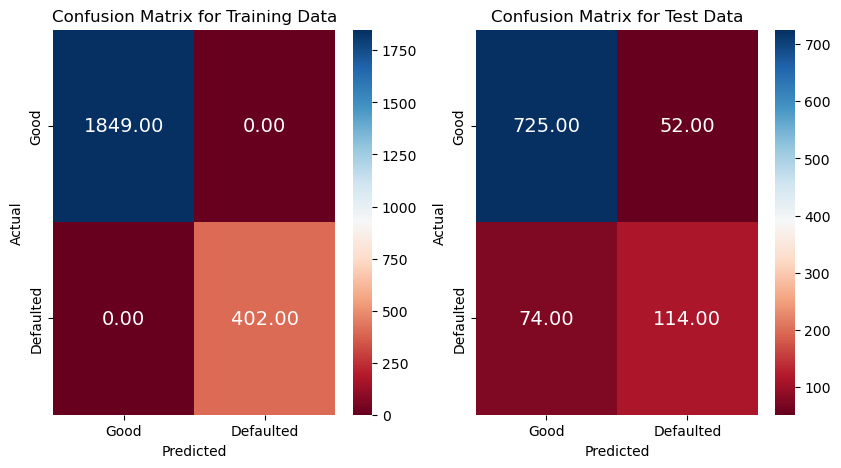

In [352]:
recall_matrix(dt, X_train, X_test, y_train, y_test)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.933
recall score on test set for 1:  0.606


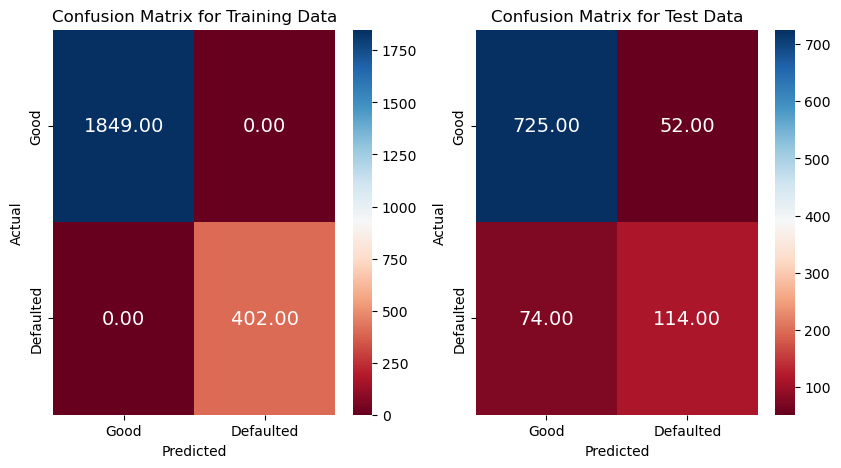

In [353]:
recall_matrix(dt2, X2_train, X2_test, y2_train, y2_test)

**Observation** 
1. As expected, Both Loan 1 and 2 have the same recall score 
2. Training model : the model is over-fitting both Loan1 and Loan2 as the scores for recall at 100% 
2. Test data- we have just over 50% for both models which is still not great performance
3. We have to bring the number up for predicting actual 1s(defaulting on loans) even if it comes at a cost of reducing predicting actual negatives. Let's keep pushing by tuning the parameters

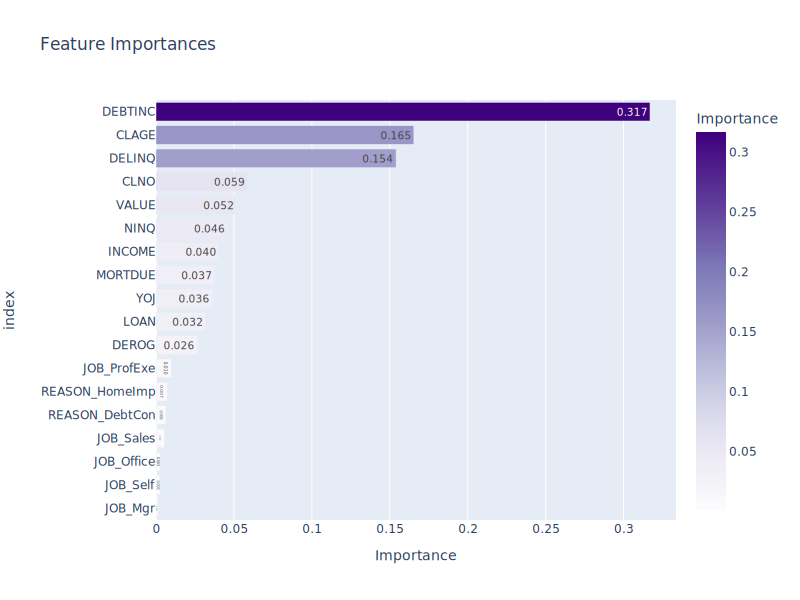

In [354]:
plot_feature_importance(dt, X_train)

**observations**
1. Unlike the LG model, DT is giving the most importance to DEBTINC, but now also considering age of oldest credit line. 
2. Let's see if it will be more or less balanced as we tune the hyperparameters. 

#### Hyperparameter Tuning:
1. Tune the random forest classifier using GridSearchCV
2. Check the performance on both training and testing datasets
3. Compare the results with the results from the base decision tree model

In [355]:
class_weights = {0: 0.2, 1: 0.8} # more weight for class 1

weighted_tree = DTC(class_weight=class_weights)

weighted_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [356]:
# Create the decision tree classifier with class weight
weighted_tree2 = DTC(class_weight=class_weights)

# Fit the classifier to the training data
weighted_tree2.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.932
recall score on test set for 1:  0.628


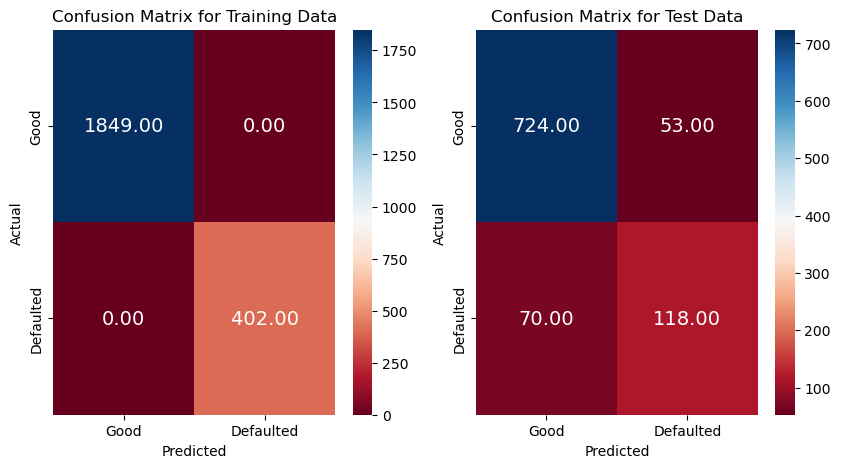

In [357]:
recall_matrix(weighted_tree, X_train, X_test, y_train, y_test)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.933
recall score on test set for 1:  0.622


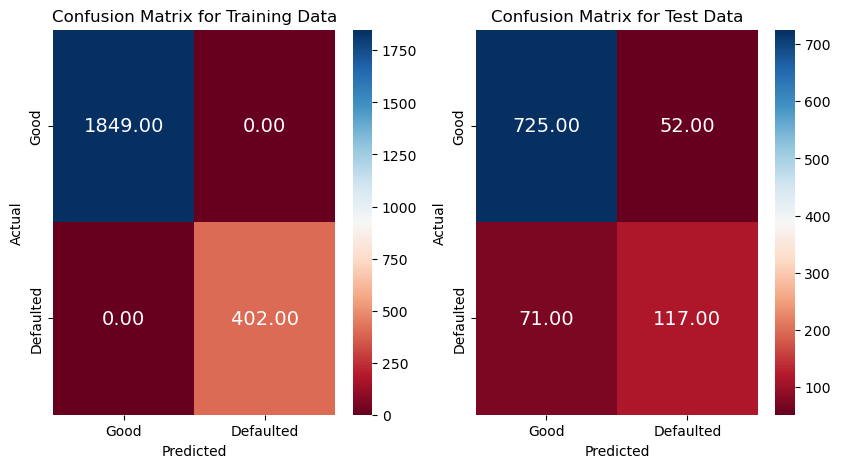

In [358]:
recall_matrix(weighted_tree2, X2_train, X2_test, y2_train, y2_test)

**Observations**
1. These weighted trees are both doing better  than the base model. The model is still overfitting the training data as expected
2. All the models thus far are doing well for the test data on predicting actual Good loans but only just better than 50% on defaulting loans, not satisfied, let's keep pushing! 

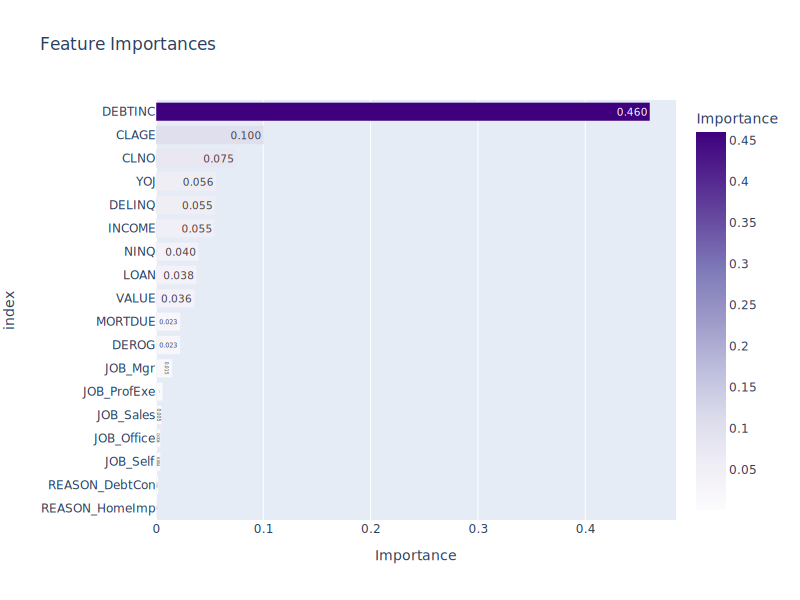

In [359]:
plot_feature_importance(weighted_tree, X_train)

**observations**
1. Still similar to the previous trees in importance but more importance now to DEBTINC but now more to YOJ as well

Let's tune the hyperparameters using Gridsearch Cross-validation to see if we can get better performance

In [360]:
parameters = {'max_depth': [3, 5, 7, 8],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 15, 20, 25, 30],
              'min_samples_split': [10, 15, 20, 25, 30, 35, 40]}

grid_tuned_dt = DTC(class_weight=class_weights)
grid_search = GridSearchCV(grid_tuned_dt, parameters, cv=10, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

grid_tuned_dt = grid_search.best_estimator_

grid_tuned_dt.fit(X_train, y_train)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 15}


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       min_samples_leaf=25, min_samples_split=15)

#### The same on Loan2

In [361]:
param_grid = {'max_depth': [3, 5, 7, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [10, 15, 20, 25, 30, 35, 40]}

grid_tuned_dt2 = DTC(class_weight=class_weights)

grid_search2 = GridSearchCV(grid_tuned_dt2, param_grid, cv=10, scoring='recall', n_jobs=-1)

grid_search2.fit(X2_train, y2_train)

print(grid_search2.best_params_)

grid_tuned_dt2 = grid_search2.best_estimator_

grid_tuned_dt2.fit(X2_train, y2_train)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 25, 'min_samples_split': 10}


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=8,
                       min_samples_leaf=25, min_samples_split=10)

**Observations**
1. The gridsearch gave slightly different parameters

recall score on training set for 0:  0.832
recall score on training set for 1:  0.903
recall score on test set for 0:  0.802
recall score on test set for 1:  0.846


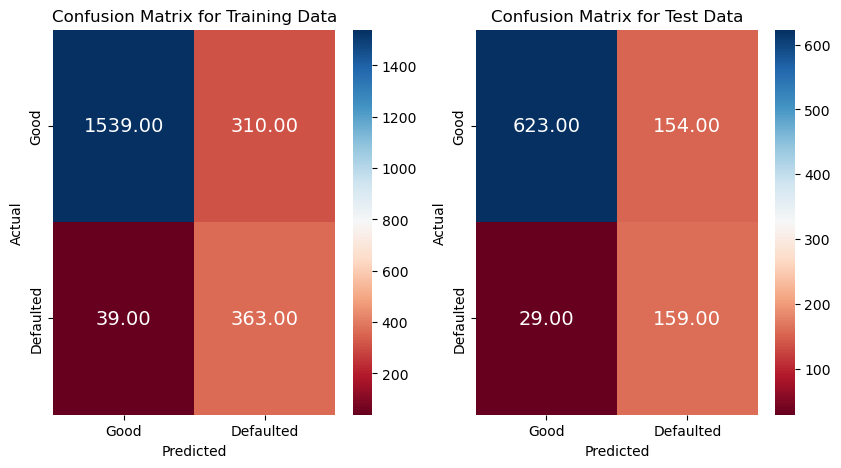

In [362]:
recall_matrix(grid_tuned_dt, X_train, X_test, y_train, y_test)

recall score on training set for 0:  0.832
recall score on training set for 1:  0.903
recall score on test set for 0:  0.802
recall score on test set for 1:  0.846


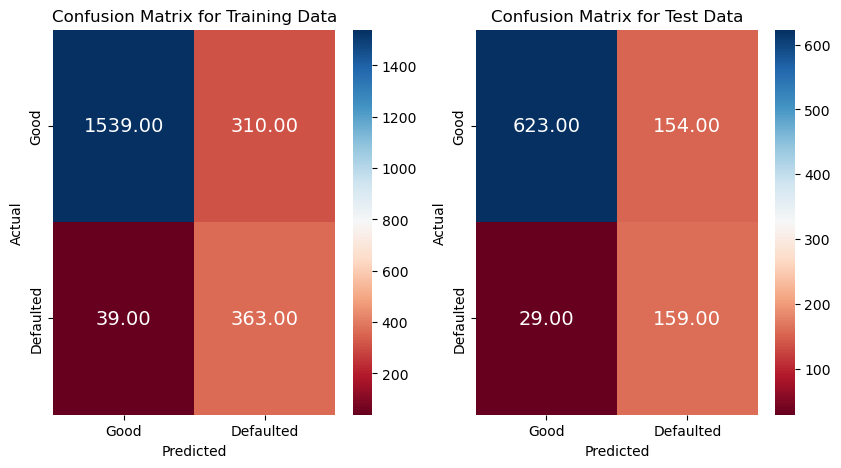

In [363]:
recall_matrix(grid_tuned_dt2, X2_train, X2_test, y2_train, y2_test)

**Observations** 
1. Finally we have achieved a better recall for DL than GL, and both Loan1 and Loan2 have the same performance
2. It's interesting that an null-values imputed dataset is having the same performance as a dataset that dropped the nulls. 
3. at GL predicted correctly at 80% and DL at 85%, this model is the best so far, and deployment worthy. Tuned DT 1 hereafter

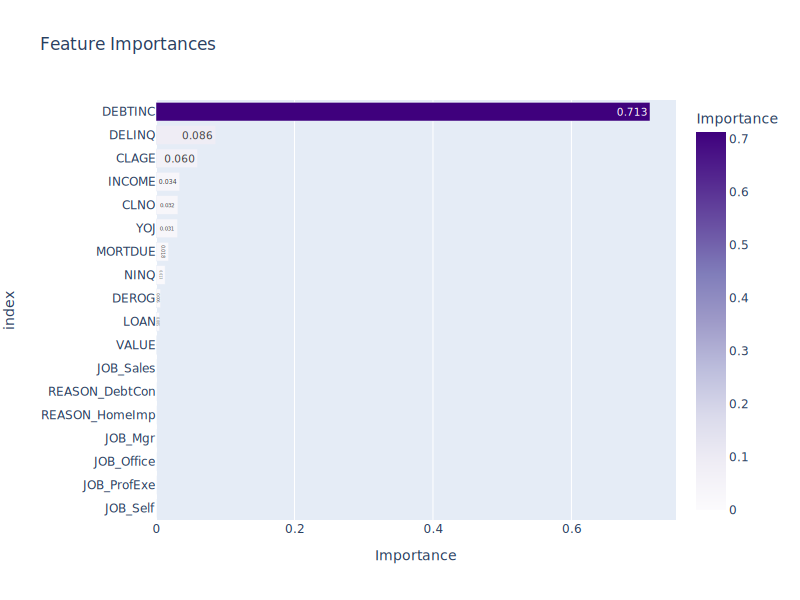

In [364]:
plot_feature_importance(grid_tuned_dt, X_train)

**Observations**
1. The tuned decision tree is giving even more importance to DEBTINC and now also to DELINQ
2. Interestingly, it's now giving importantce to age of oldest credit line and income but much less than the first 2 features

Let's try tuning the hyperparamters once again manually by reducing the depth, and samples in the leaf and split

In [365]:
final_DT = DTC(class_weight= class_weights)

parameters = {'criterion': ['gini', 'entropy'], 
              'max_depth': [6, 8, 10, 12], 
              'min_samples_leaf': [5, 10, 15, 20, 25], 
              'min_samples_split': [10, 15, 20, 25, 30]}

grid_obj = GridSearchCV(final_DT, parameters, n_jobs=-1, cv=10)
grid_obj = grid_obj.fit(X_train, y_train)

final_DT = grid_obj.best_estimator_
final_DT.fit(X_train, y_train)
print(grid_obj.best_params_)

final_DT = grid_obj.best_estimator_
final_DT = final_DT.fit(X_train, y_train)
final_DT_pred = final_DT.predict(X_train)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10}


recall score on training set for 0:  0.903
recall score on training set for 1:  0.918
recall score on test set for 0:  0.861
recall score on test set for 1:  0.723


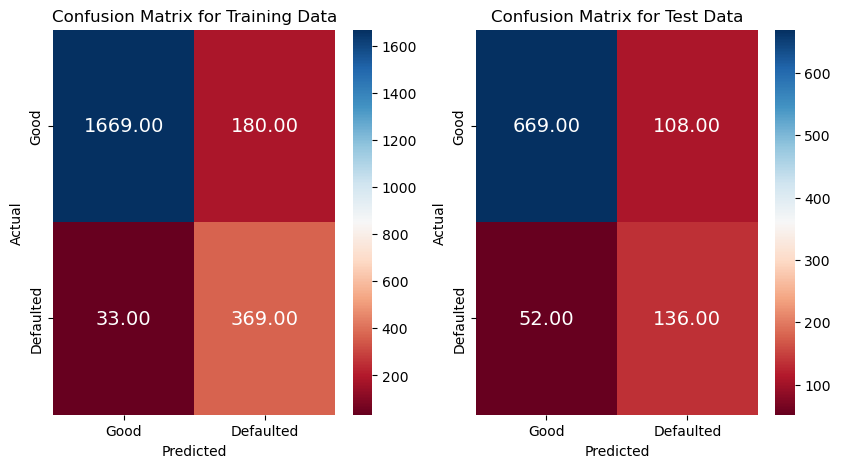

In [366]:
recall_matrix(final_DT, X_train, X_test, y_train, y_test)

**Observations** 
1. This model is giving the best results so far at about 82% for class 1, and the best results as well for class 0(good loans)
2. This means that this model thus far is doing a balanced job, but we still need to keep pushing it to get a better score for identifying defaulting loans
3. This model predicted 154 clients correctly vs the previous models at 149 and 138

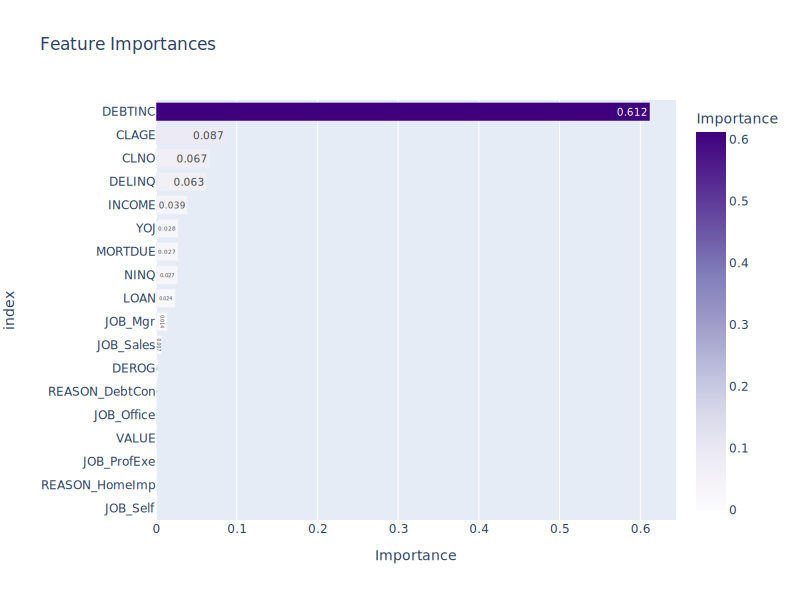

In [367]:
plot_feature_importance(final_DT, X_train)

**Observations:**
1. The tuned model is giving the an overwhelming importance to just 1 variable: Debt to income ratio at about 0.73 while the others are at about 0.1 or less 
2. The model has a high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variable
3. According to this model `Debt to income ratio`, `Age of oldest credit line`, and `Loan amount` are the 3 most important features that describe why a client is defaulting which suggests if a client's DEBTINC is high and their loan amount is also higher than usual, it would take them a long time to pay it off, but I'm not sure why age of the oldest credit line is playing an important part. 

## Visualizing the tuned-decision tree

**Let's plot the tree** and check if the assumptions about DEBTINC. We are only visualizing the tree up to 4 levels.

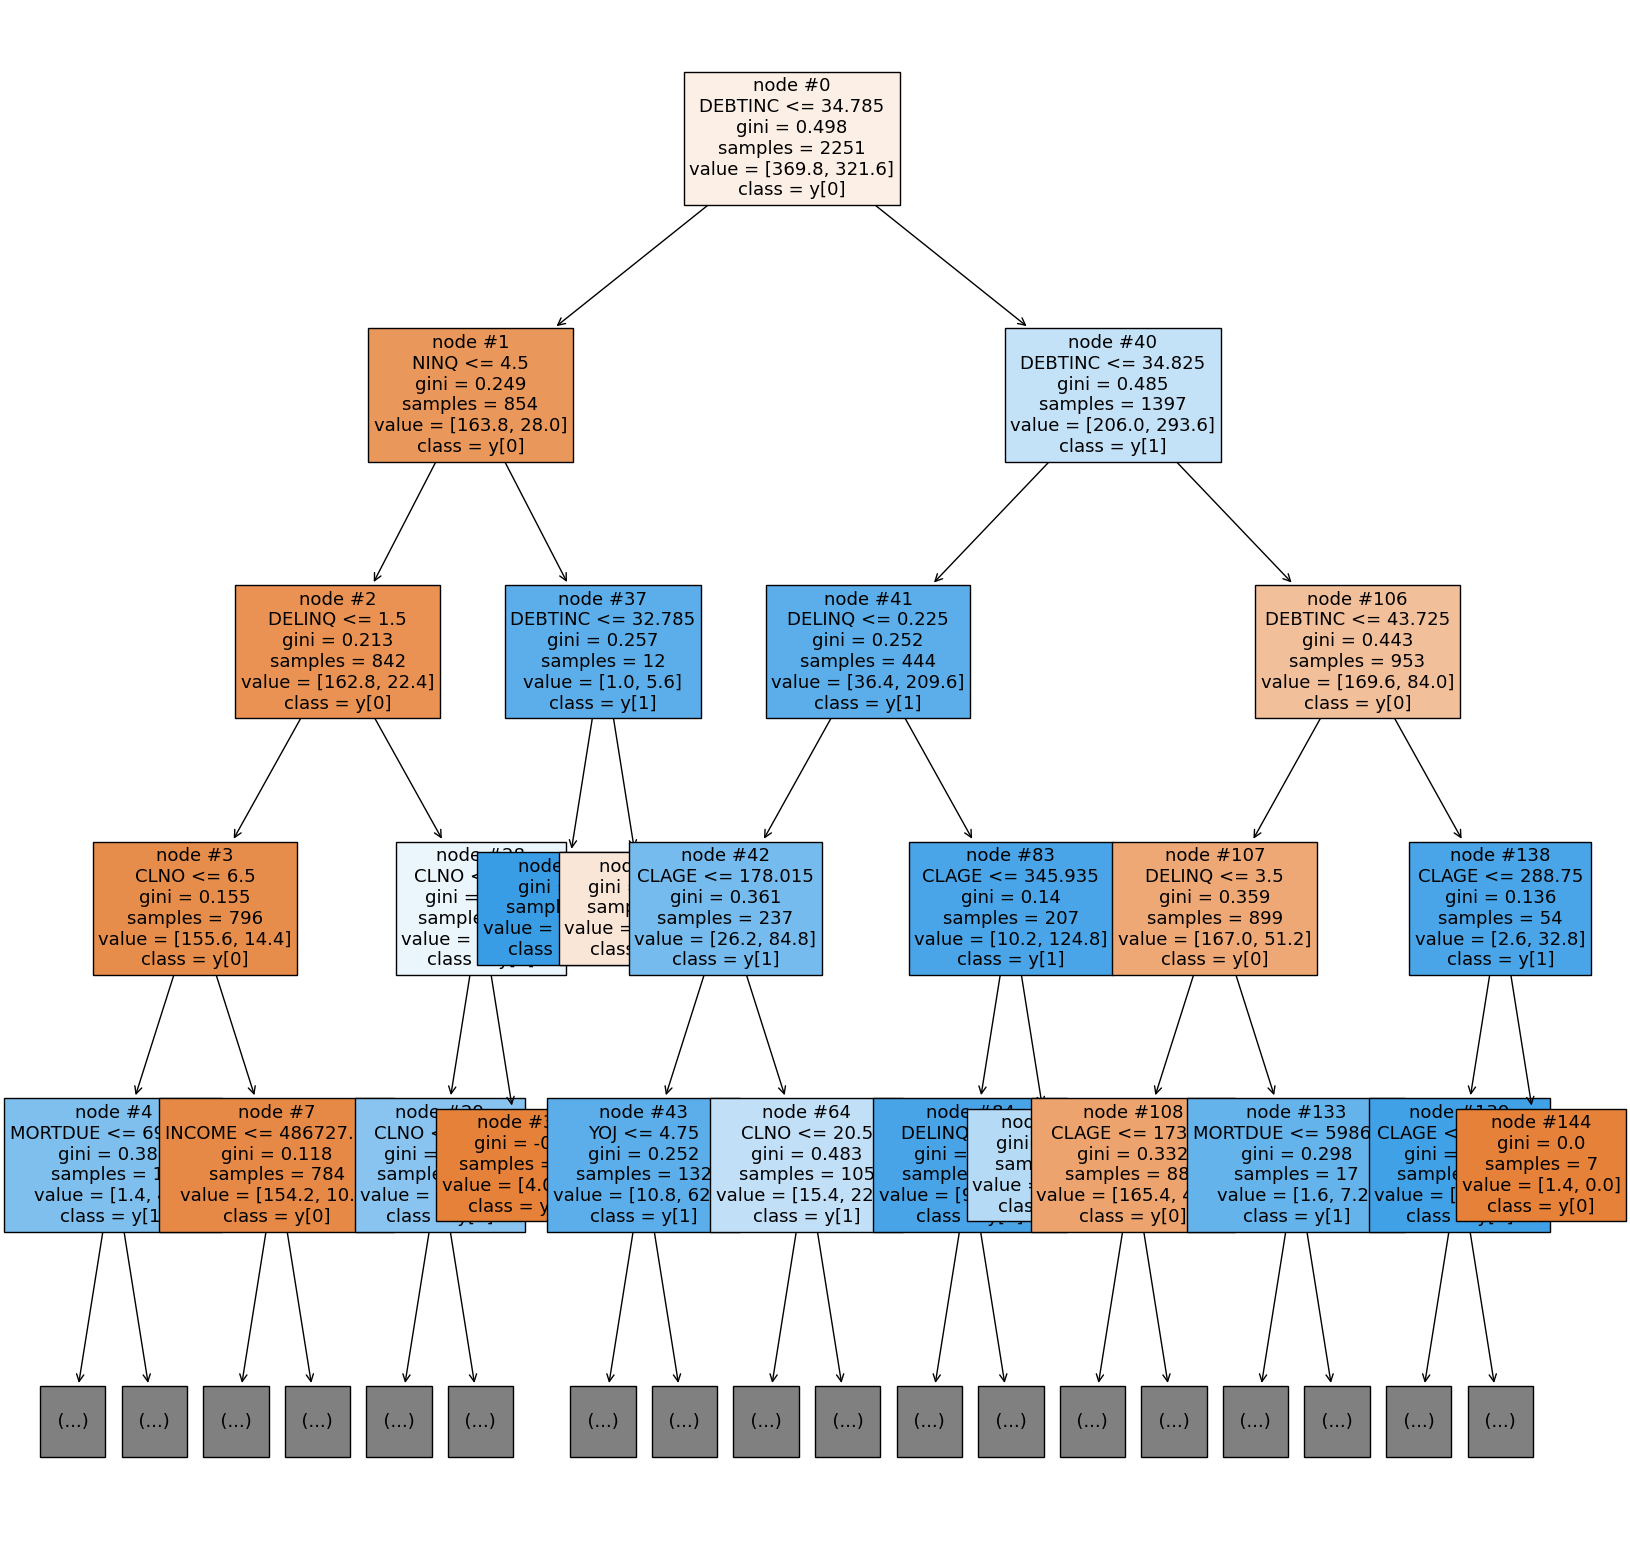

In [368]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(final_DT,
               max_depth = 4,
               feature_names = features, 
               filled = True, fontsize = 13,
               node_ids = True, 
               class_names = True)

plt.show()

**Note:** Blue leaves represent the defaulted loans, while the orange leaves represent the paid loans. Also, the darker the leaf, the higer the number of observations

**Observations:** 

1. To start, it's debt to income ratio then splits off into number of recent inquiries and then further into number of credit lines and age of oldest credit line
2. It seems like the categorical variables such a person's job and their reasons for taking a loan are not important in deciding the split

#### using XG Boost to see if we can get better performance

In [369]:
import xgboost as xgb

# Create an instance of XGBClassifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.976
recall score on test set for 1:  0.665


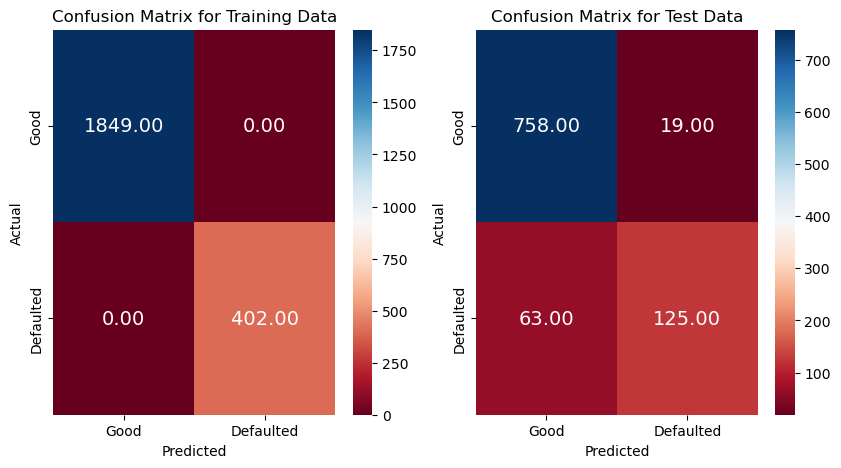

In [370]:
recall_matrix(xgb_model, X_train, X_test, y_train, y_test)

Let's tune the hyperparameters for one final push! 

In [371]:
finalXG = xgb.XGBClassifier()

parameters = {'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 200]}

xgb_grid_search = GridSearchCV(estimator=finalXG, param_grid=parameters, scoring='recall', cv=10)
xgb_grid_search.fit(X_train, y_train)

final_XG = xgb_grid_search.best_estimator_
print(xgb_grid_search.best_params_)


{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 200}


In [372]:
y_pred = final_XG.predict(X_test)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.976
recall score on test set for 1:  0.665


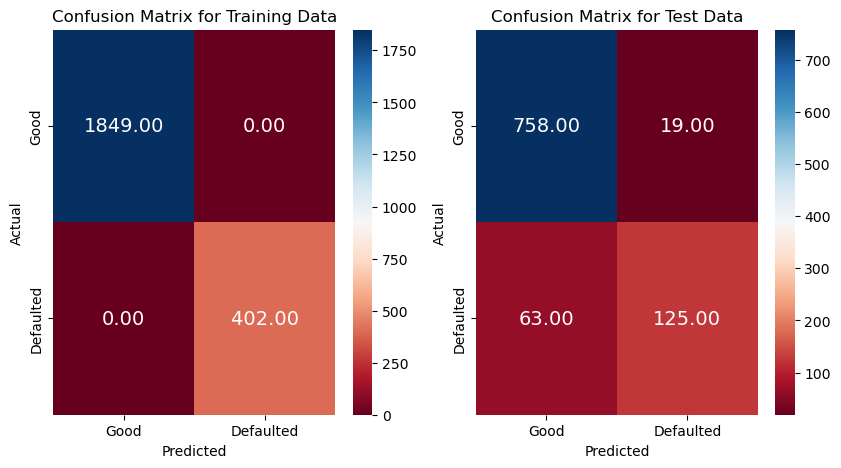

In [373]:
recall_matrix(final_XG, X_train, X_test, y_train, y_test)

**Observations**
1. Seems like XG boost did not do as well as expected even after tuning the hyperparameters using gridsearch

#### Building a Random Forest Classifier

In [374]:
rf = RFC(random_state = 7)

rf = rf.fit(X_train, y_train)

recall score on training set for 0:  1.0
recall score on training set for 1:  1.0
recall score on test set for 0:  0.988
recall score on test set for 1:  0.649


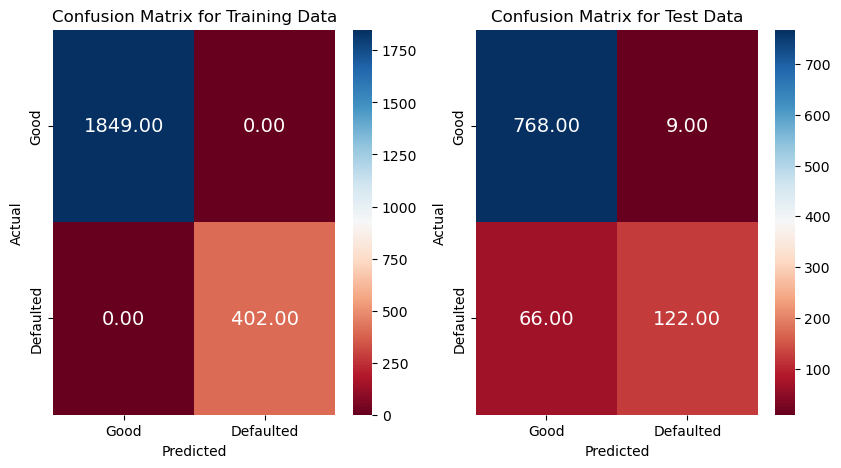

In [375]:
recall_matrix(rf, X_train, X_test, y_train, y_test)

**Observations**
1. Similar initial performance to the decision tree base model where the data is over-fitted to the training data 
2. Similar to the DT, it's doing a great job on true negatives, but poor on the true positives

### **Random Forest Classifier Hyperparameter Tuning**

In [376]:
tuned_rf = RFC(criterion = "entropy", random_state = 7)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.3, 1: 0.7}]}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(tuned_rf, parameters, scoring = scorer, cv = 10)

grid_obj = grid_obj.fit(X_train, y_train)

grid_cv_tuned = grid_obj.best_estimator_

cv_tuned_rf = grid_cv_tuned.fit(X_train, y_train)

print(grid_obj.best_params_)

{'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.9, 'min_samples_leaf': 25, 'n_estimators': 110}


recall score on training set for 0:  0.931
recall score on training set for 1:  0.754
recall score on test set for 0:  0.912
recall score on test set for 1:  0.702


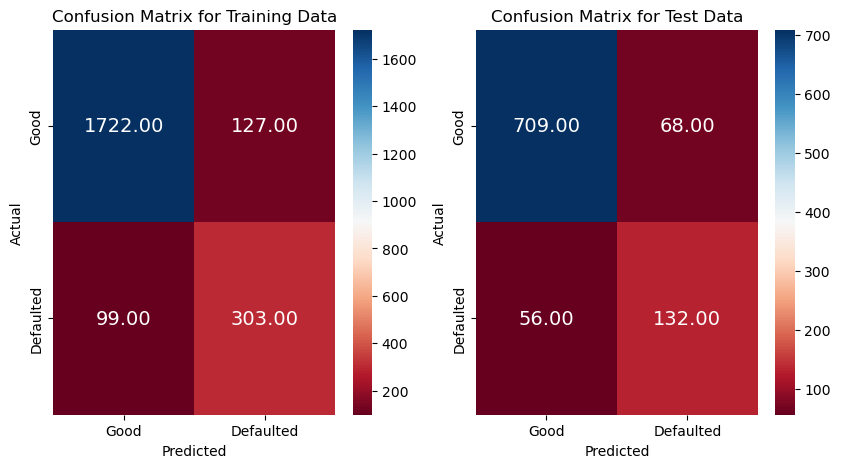

In [377]:
recall_matrix(cv_tuned_rf, X_train, X_test, y_train, y_test)

**Observations**
1. So the model isn't overfitting like the base logistic regression and decision tree models but the performance is not better or different from the tuned Decision tree model
2. The training model is giving the same recall score for the test data so this is a good sign

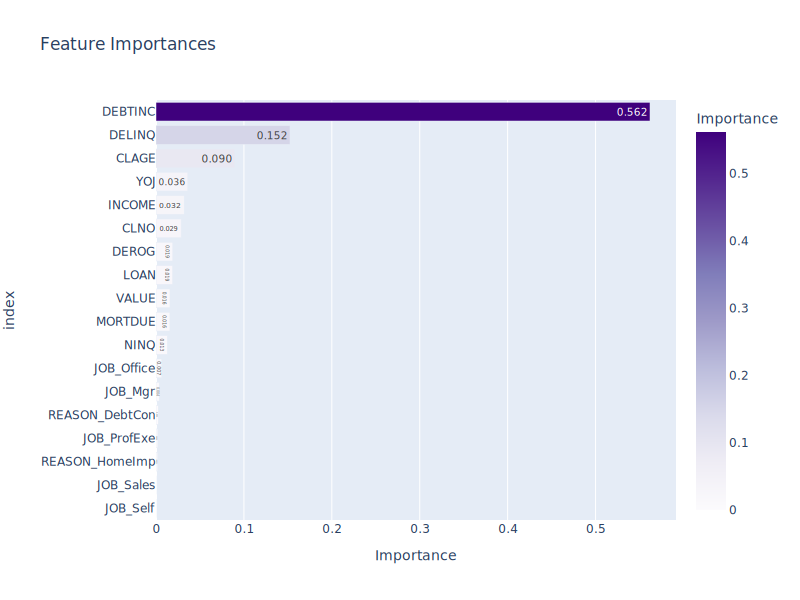

In [378]:
plot_feature_importance(cv_tuned_rf, X_train)

**Observations**
1. This tuned RF is giving less importance to DEBTINC, but still # of delinquent credit lines, and age of oldest credit line 
2. I wonder if I would get better performance by deleting some features such as the JOB category...

## Model conclusion 
#### Comparison of various techniques and their relative performance based on chosen Recall:

- There is a large difference between the linear models (LG) and the non-linear models such as the DT, RF, and XGB
- the capacity to predict actual defaults was quite poor on logic regression but it did a great job for predicting actual negatives.
- With recall as the measure of chosen measure of success(reason for this explained in ([Model evaluation criterion](#Model-evaluation-criterion)) the Tuned DT 1 (tuned with gridsearch CV) gave the best performance for actual negatives at 0.80(80% correctly predicted GL) and and 0.85(85% correctly predicted DL)

#### tradeoff between model performance and model interpretability: 

- I do not think that the linear model is more difficult to interpret; perhaps it simplifies things too much whereas the non-linear models DT, RF etc. do a better job of taking into account the intricacies in the problem of seeing who will default 
- The random forest did not do a good job and it was placing importance on the same features as the decision tree except in different order of importance such as age of the oldest line of credit, and income, and loan size, and number of inquires about credit 
- It seems mostly credit-related features are important in evaluating the GL and DL in finding patterns for who will default as opposed to job-type or value of property
- This is an interesting point to explore because the LOAN, VALUE, and MORTDUE variables are large, well into the tens of thousands, the smaller variables have more explanatory power. 

## Executive summary

1. GB needs to be judicious approving loans where DLs incur losses for the bank, however, the bank still needs to take risks in approving loans to generate profit from interest. In order to predict DLs, a balanced approach where predicting DLs is maximized and balances out the GLs while also getting insight into the factors which impact this outcome is the best approach. 
2. The best model to satisfy this objective and worthy of deployment is the Tuned DT 1 model which is a decision tree classifier. The model based these predictions by more heavily placing importance on credit-related features over features like occupation-type, amount of time worked at current job, or the mortgage due on the property. 
3. Based on the model and EDA, there seems to be a very little albeit significant difference between clients who DL and GL in their loan amount, debt to income ratio, and their occupations but there is a significant difference in their derogatory reports and delinquent credit lines. 

##  Problem solution and summary (solution design proposal): 

- Since both approving GL and avoiding DL are desriable for GB, this model does almost an equally decent job of correctly identifying the DL and GL to a level where the bank can profit overall. The objective of maximizing recall was achieved by having a higher rate of correctly identifying DL over false DL(although I do believe it can be tuned and refined further based on feature refinement) but nonetheless GB can make good use of the Tuned DT 1 at 85% rate of identifying DL

### Recommendations for implementation
1. Features to include/refine/explore: GB should focus on ensuring that debt to income ratio data is collect/calculated with accurately as it is the most important feature according to the models. 
2. Further, the bank should focus on refining categorical variables such as people's jobs, and their reasons for taking loans, and look to getting credit scores, and employment history to create a better profile of the clients
3. Perhaps a separate dataframe with just credit-related variables could give a better prediction
3. FOR Stakeholders: some of the limitations are details about total income of the client, their industry/job type, types of debt other than the loan from Global Bank. It is recommended that stakeholders consider these limitations when considering how much to rely on the model when deciding whether or not to give approve a loan. 